# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [83]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
#from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [84]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [85]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Print the current working directory
print(current_dir)

/content


In [86]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/python/computer vision/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/python/computer vision/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [87]:
#shape of labels
labels.shape

(4750, 1)

In [88]:
#shape of images
images.shape

(4750, 128, 128, 3)

In [89]:
# describe the labels
labels.describe()

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


## Exploratory Data Analysis

In [90]:
# set number of classes
num_classes = 10

# creating a list of category names in alphabetical order
classes = ["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"]


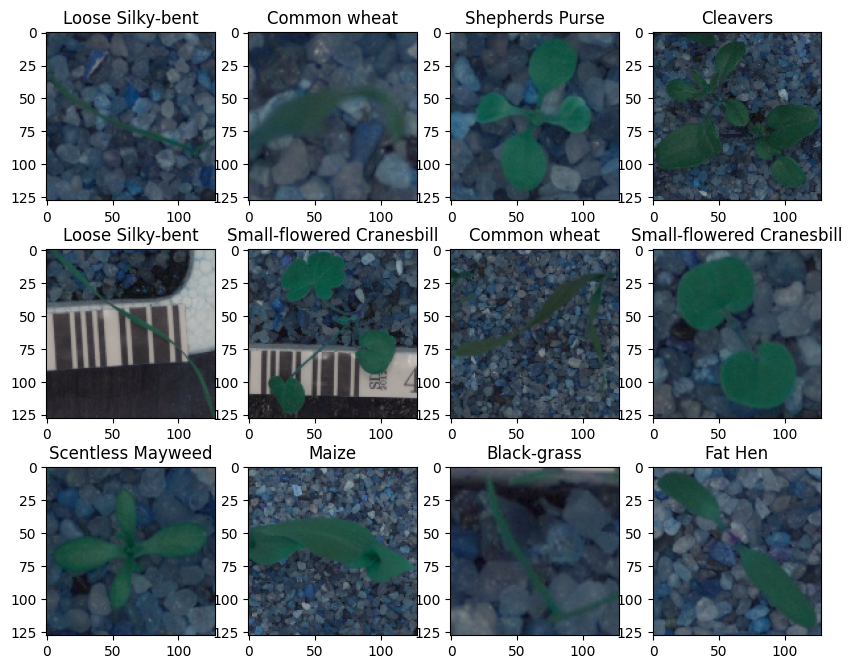

In [91]:
# Plotting the images with their labels randomly for 12 images
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 8))
keys=dict(labels['Label'])
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(images[random_index, :])
        ax.set_title(keys[random_index])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

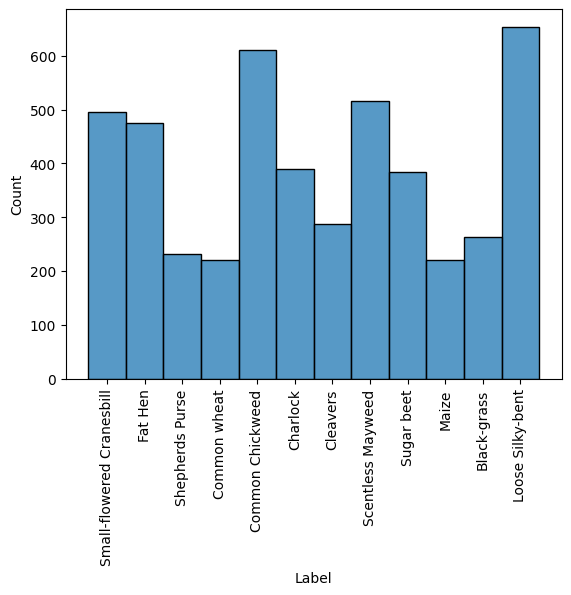

In [92]:
#helps to count the number of images in each category
sns.histplot(x=labels['Label'])
plt.xticks(rotation='vertical')

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [93]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Resizing the images to 64x64 pixels
images_decreased = [cv2.resize(image, (64, 64), interpolation=cv2.INTER_LINEAR) for image in images]

#### Show Random image before and after a resize

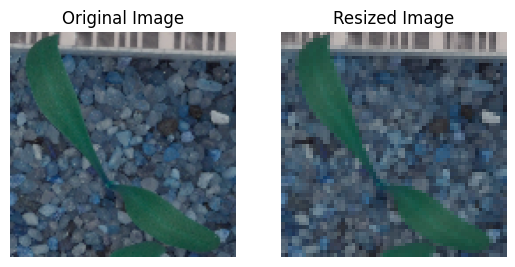

In [94]:
# Select a random image from the images list
random_image = random.choice(images)

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Resize the image
resized_image = cv2.resize(random_image, (64, 64))

# Display the resized image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.axis("off")

plt.show()

Observation- I can see the image has been resized.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [95]:
# set the train and test split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(np.array(images_decreased), labels, test_size=0.1, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1, random_state=42, stratify=y_train_temp)

In [96]:
#showing the shape of the train, test and validation data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encode the target labels

In [97]:
# setting the labelbinarizer
from sklearn.preprocessing import LabelBinarizer

# Convert labels from names to one-hot vectors using LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

In [98]:
# Print the encoded labels
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

### Data Normalization

In [99]:
# Normalizing the data
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building

In [100]:
# Clearing backend session so that the model trains faster
backend.clear_session()

# setting the seed for numpy and random so that the results are reproducible
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [101]:
# Initialize a sequential model
initial_model = Sequential()

# Add the first convolutional layer with 128 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
# The input_shape denotes the dimensions of the input image.
initial_model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Add max pooling to reduce the size of the output from the first convolutional layer
initial_model.add(MaxPooling2D((2, 2), padding='same'))

# Add another convolutional layer with 64 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
initial_model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
initial_model.add(MaxPooling2D((2, 2), padding='same'))

# Add another convolutional layer with 32 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
initial_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
initial_model.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the output of the convolutional layer after max pooling to prepare for creating dense connections
initial_model.add(Flatten())

# Add a fully connected dense layer with 16 neurons
initial_model.add(Dense(16, activation='relu'))
initial_model.add(Dropout(0.3))

# Add the output layer with 12 neurons and the softmax activation function for multi-class classification
initial_model.add(Dense(12, activation='softmax'))

# Initialize the Adam optimizer
optimizer_initial = Adam()

# Compile the model with categorical cross-entropy loss and accuracy metric
initial_model.compile(optimizer=optimizer_initial, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
initial_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [102]:
# Fit the model on the training data and validate using the validation data
initial = initial_model.fit(
    X_train_normalized, y_train_encoded,
    epochs=30,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/30
121/121 - 4s - loss: 2.4514 - accuracy: 0.1159 - val_loss: 2.4308 - val_accuracy: 0.1355 - 4s/epoch - 31ms/step
Epoch 2/30
121/121 - 1s - loss: 2.3049 - accuracy: 0.2103 - val_loss: 2.0252 - val_accuracy: 0.3551 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 2.0210 - accuracy: 0.2997 - val_loss: 1.8007 - val_accuracy: 0.3879 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.8811 - accuracy: 0.3371 - val_loss: 1.7192 - val_accuracy: 0.4159 - 1s/epoch - 10ms/step
Epoch 5/30
121/121 - 1s - loss: 1.7950 - accuracy: 0.3397 - val_loss: 1.5922 - val_accuracy: 0.4393 - 1s/epoch - 10ms/step
Epoch 6/30
121/121 - 1s - loss: 1.6918 - accuracy: 0.3782 - val_loss: 1.4864 - val_accuracy: 0.5023 - 1s/epoch - 10ms/step
Epoch 7/30
121/121 - 1s - loss: 1.6492 - accuracy: 0.3988 - val_loss: 1.3909 - val_accuracy: 0.5397 - 1s/epoch - 10ms/step
Epoch 8/30
121/121 - 1s - loss: 1.5483 - accuracy: 0.4341 - val_loss: 1.3003 - val_accuracy: 0.5584 - 1s/epoch - 10ms/step
Epoch 9/30
121/1

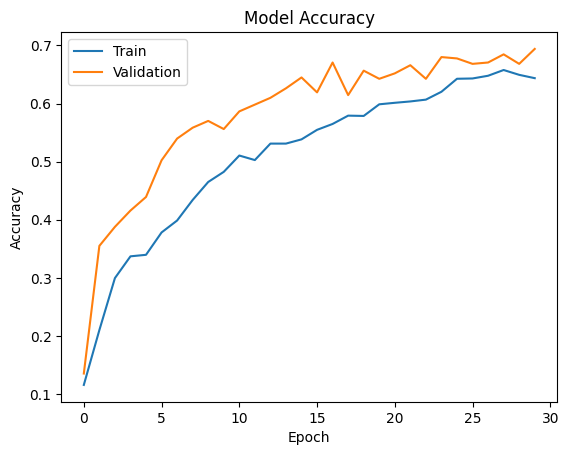

In [103]:
# showing the classification report for the validation data
plt.plot(initial.history['accuracy'], label='Train')
plt.plot(initial.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Observation
- Can see as we run more iterations the test and validation sets are getting more accurate up to 69%

In [104]:
accuracy = initial_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9181 - accuracy: 0.6926 - 78ms/epoch - 5ms/step


14/14 [==============================] - 0s 3ms/step


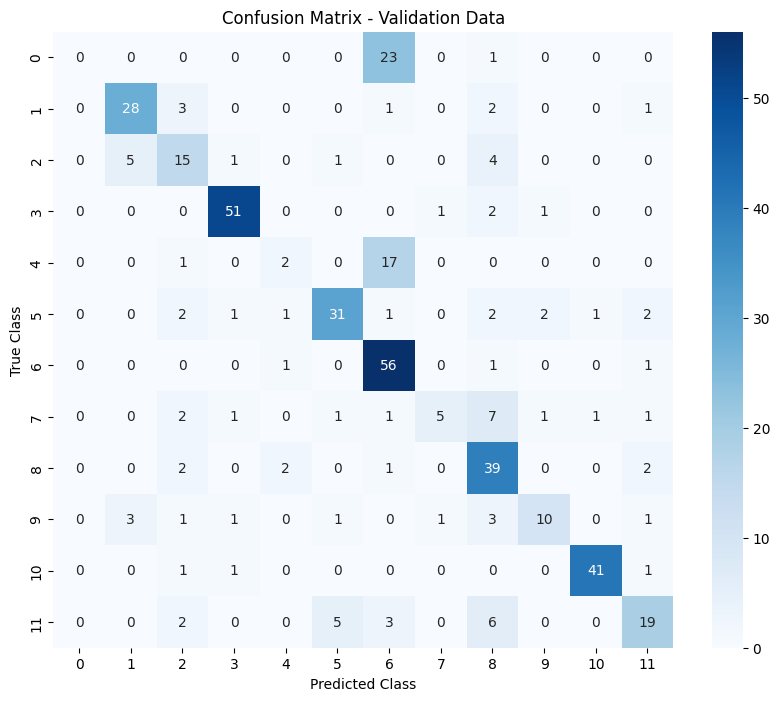

In [105]:
# Predicting the classes for the validation data
y_val_pred = initial_model.predict(X_val_normalized)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Creating a confusion matrix
cm = confusion_matrix(np.argmax(y_val_encoded, axis=1), y_val_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

#### Observations
- Model not correctly predicting several plants accurately
- Accuracy a bit low at 69%.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [106]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [107]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [108]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [109]:
# Initializing a sequential model
model_enhanced = Sequential()

# Adding the first convolutional layer with 64 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
# The input shape denotes the dimensions of the input image.
model_enhanced.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output from the first convolutional layer
model_enhanced.add(MaxPooling2D((2, 2), padding='same'))

# Adding another convolutional layer with 32 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
model_enhanced.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Adding max pooling to reduce the size of the output from the second convolutional layer
model_enhanced.add(MaxPooling2D((2, 2), padding='same'))

# Adding batch normalization layer to normalize the activations of the previous layer
model_enhanced.add(BatchNormalization())

# Flattening the output of the convolutional layer after max pooling to prepare for creating dense connections
model_enhanced.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model_enhanced.add(Dense(16, activation='relu'))

# Adding dropout with a dropout rate of 0.3 to prevent overfitting
model_enhanced.add(Dropout(0.3))

# Adding the output layer with 12 neurons and the softmax activation function for multi-class classification
model_enhanced.add(Dense(12, activation='softmax'))

# Initializing the Adam optimizer
optimizer = Adam()

# Compiling the model with categorical cross-entropy loss and accuracy metric
model_enhanced.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_enhanced.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

In [110]:
# Define the number of epochs
num_epochs = 30

# Define the batch size
batch_size = 64

# Train the model on the training data
training_history = model_enhanced.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False),
    epochs=num_epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

Epoch 1/30
60/60 [==============================] - 8s 108ms/step - loss: 2.1362 - accuracy: 0.2509 - val_loss: 2.4017 - val_accuracy: 0.1285 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 6s 95ms/step - loss: 1.6999 - accuracy: 0.3986 - val_loss: 2.3054 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 6s 104ms/step - loss: 1.4921 - accuracy: 0.4674 - val_loss: 2.2270 - val_accuracy: 0.2804 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 105ms/step - loss: 1.3671 - accuracy: 0.5133 - val_loss: 2.0976 - val_accuracy: 0.4626 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 8s 141ms/step - loss: 1.2736 - accuracy: 0.5459 - val_loss: 1.7816 - val_accuracy: 0.5701 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 7s 119ms/step - loss: 1.1512 - accuracy: 0.5890 - val_loss: 1.6278 - val_accuracy: 0.5935 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 7s 109ms/step - los

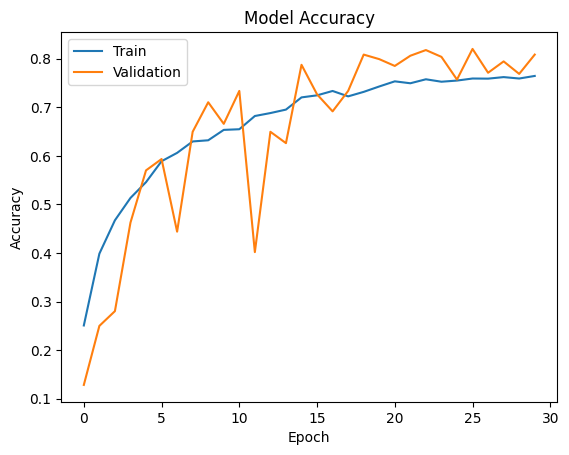

In [111]:
# showing the classification report for the validation data
plt.plot(training_history.history['accuracy'], label='Train')
plt.plot(training_history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Observation
- We can see the learning rate reducer is helping to improve accuracy.

In [112]:
model_enhanced_accuracy = model_enhanced.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.6520 - accuracy: 0.8084 - 79ms/epoch - 5ms/step


14/14 [==============================] - 0s 3ms/step


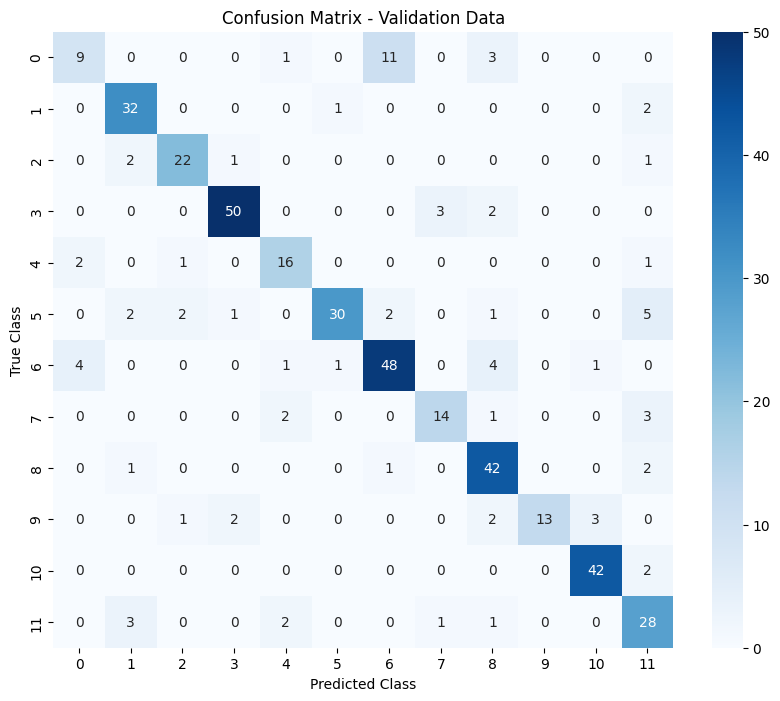

In [113]:
# Predicting the classes for the validation data
y_val_pred = model_enhanced.predict(X_val_normalized)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Creating a confusion matrix
cm = confusion_matrix(np.argmax(y_val_encoded, axis=1), y_val_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

#### Observations
- We are getting better accuracy now, 80%. But we still have some images being classified incorrectly in one of our groups.

#### Second enhanced model

In [114]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [115]:
# Initialize a sequential model
improved_model = Sequential()

# Add the first convolutional layer with 128 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
improved_model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
improved_model.add(BatchNormalization())

# Add max pooling to reduce the size of the output from the first convolutional layer
improved_model.add(MaxPooling2D((2, 2), padding='same'))

# Add another convolutional layer with 64 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
improved_model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
improved_model.add(BatchNormalization())

# Add max pooling to reduce the size of the output from the second convolutional layer
improved_model.add(MaxPooling2D((2, 2), padding='same'))

# Add another convolutional layer with 32 filters and a kernel size of 3x3. Padding 'same' maintains the output size as the input size.
improved_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
improved_model.add(BatchNormalization())

# Add max pooling to reduce the size of the output from the third convolutional layer
improved_model.add(MaxPooling2D((2, 2), padding='same'))

# Flatten the output of the convolutional layer after max pooling to prepare for creating dense connections
improved_model.add(Flatten())

# Add a fully connected dense layer with 128 neurons
improved_model.add(Dense(128, activation='relu'))

# Add dropout with a dropout rate of 0.5 to prevent overfitting
improved_model.add(Dropout(0.5))

# Add the output layer with 12 neurons and the softmax activation function for multi-class classification
improved_model.add(Dense(12, activation='softmax'))

# Initialize the Adam optimizer
optimizer_improved = Adam()

# Compile the model with categorical cross-entropy loss and accuracy metric
improved_model.compile(optimizer=optimizer_improved, loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary of the model
improved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                        

In [116]:
# Define the number of epochs
num_epochs = 30

# Define the batch size
batch_size = 64

# Train the model on the training data
training_history = improved_model.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=False),
    epochs=num_epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]
)

Epoch 1/30
60/60 [==============================] - 9s 100ms/step - loss: 2.2635 - accuracy: 0.2892 - val_loss: 4.8692 - val_accuracy: 0.0607 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 5s 82ms/step - loss: 1.4863 - accuracy: 0.4845 - val_loss: 6.6613 - val_accuracy: 0.0561 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 7s 123ms/step - loss: 1.1758 - accuracy: 0.5961 - val_loss: 7.8302 - val_accuracy: 0.0561 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 5s 89ms/step - loss: 0.9690 - accuracy: 0.6680 - val_loss: 8.0152 - val_accuracy: 0.1495 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 5s 81ms/step - loss: 0.8629 - accuracy: 0.7071 - val_loss: 8.7731 - val_accuracy: 0.1379 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 8s 130ms/step - loss: 0.7637 - accuracy: 0.7409 - val_loss: 7.4956 - val_accuracy: 0.1402 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - ETA: 0s - loss: 0.674

In [117]:
improved_model_accuracy = improved_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.4628 - accuracy: 0.8547 - 114ms/epoch - 8ms/step


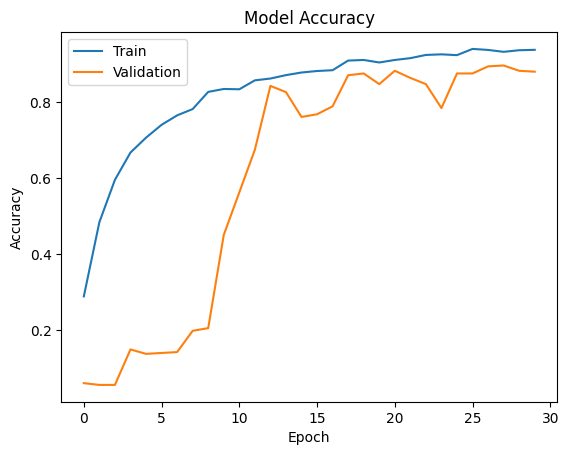

In [118]:
# showing the classification report for the validation data
plt.plot(training_history.history['accuracy'], label='Train')
plt.plot(training_history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

14/14 [==============================] - 0s 5ms/step


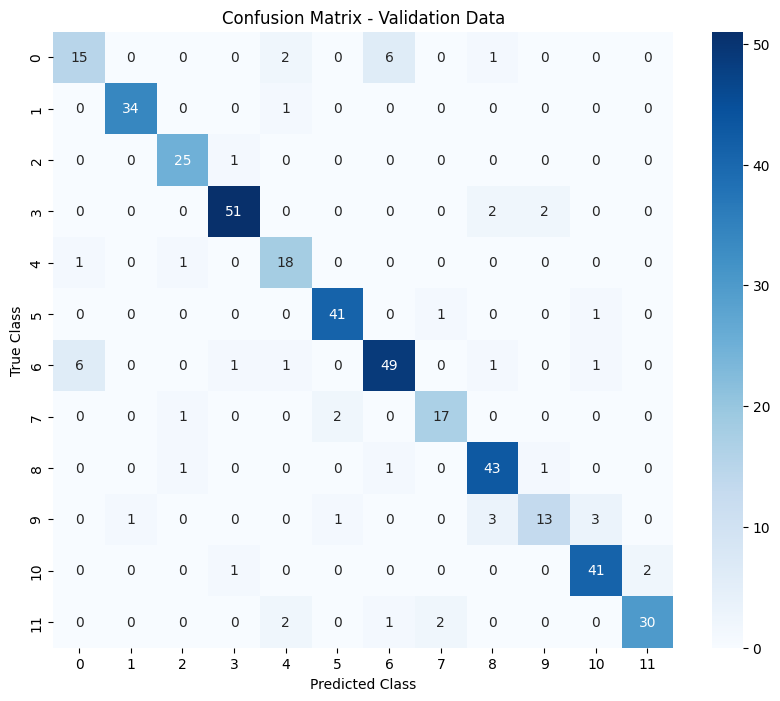

In [119]:
# Predicting the classes for the validation data
y_val_pred = improved_model.predict(X_val_normalized)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Creating a confusion matrix
cm = confusion_matrix(np.argmax(y_val_encoded, axis=1), y_val_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Data')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [120]:
# Here we would get the output as probabilities for each category
y_pred = improved_model.predict(X_val_normalized)  # Replace 'input_data' with the variable or data you want to use for prediction

14/14 [==============================] - 0s 5ms/step


## Final Model

My final model is the 3rd model called "Improved model".

- In the third model we used 3 layers with 128, 64, 32 layers respectively.
- We added Batch Normalization after each layer, batch normalization can help stabilize and speed up the training process by normalizing the inputs to each layer.
- We adjusted the drop out rate slightly
- With these changes we were able to achieve 88% accuracy which is a significant improvement over the other models.


### Visualizing the prediction

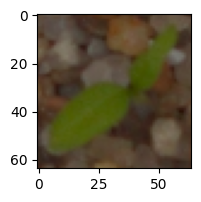

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Common Chickweed']
True Label: Common Chickweed
---


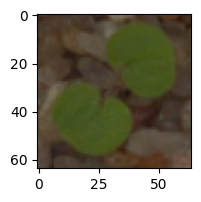

1/1 [==============================] - 0s 18ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill
---


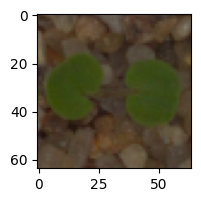

1/1 [==============================] - 0s 20ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill
---


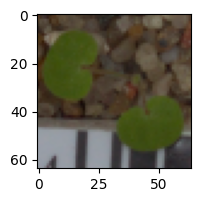

1/1 [==============================] - 0s 23ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill
---


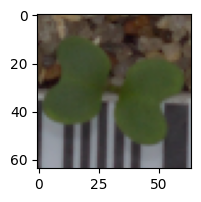

1/1 [==============================] - 0s 18ms/step
Predicted Label: ['Charlock']
True Label: Charlock
---


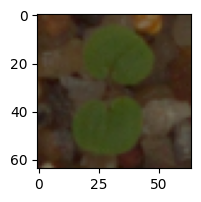

1/1 [==============================] - 0s 21ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill
---


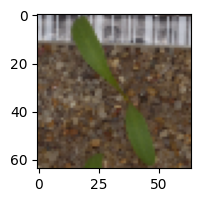

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Sugar beet']
True Label: Sugar beet
---


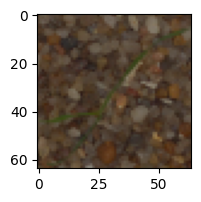

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Black-grass']
True Label: Loose Silky-bent
---


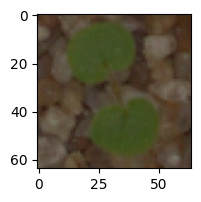

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Cleavers']
True Label: Small-flowered Cranesbill
---


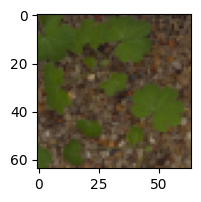

1/1 [==============================] - 0s 23ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill
---


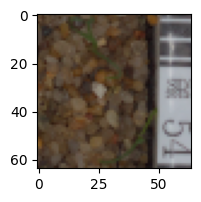

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Loose Silky-bent']
True Label: Loose Silky-bent
---


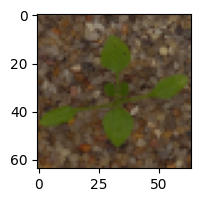

1/1 [==============================] - 0s 26ms/step
Predicted Label: ['Common Chickweed']
True Label: Common Chickweed
---


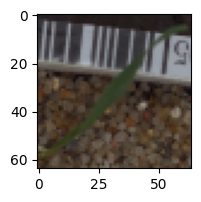

1/1 [==============================] - 0s 21ms/step
Predicted Label: ['Common wheat']
True Label: Common wheat
---


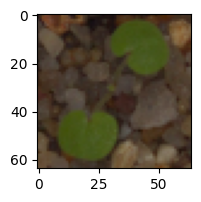

1/1 [==============================] - 0s 20ms/step
Predicted Label: ['Small-flowered Cranesbill']
True Label: Small-flowered Cranesbill
---


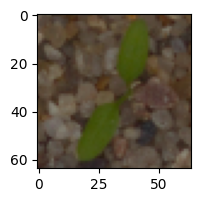

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Common Chickweed']
True Label: Common Chickweed
---


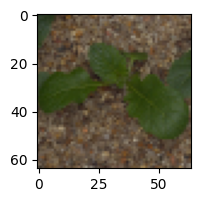

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Charlock']
True Label: Charlock
---


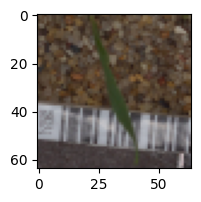

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Common wheat']
True Label: Common wheat
---


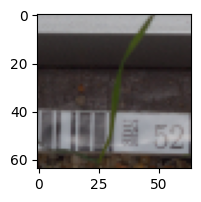

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Black-grass']
True Label: Black-grass
---


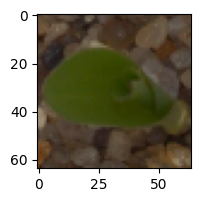

1/1 [==============================] - 0s 20ms/step
Predicted Label: ['Maize']
True Label: Maize
---


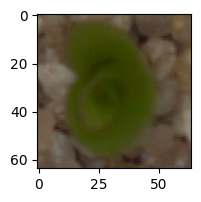

1/1 [==============================] - 0s 19ms/step
Predicted Label: ['Maize']
True Label: Maize
---


In [121]:
# Loop to visualize and predict labels for 20 images from the test data
for i in range(20):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_test[i])
    plt.show()

    # Predict the test data using the final model selected
    predicted_label = enc.inverse_transform(improved_model.predict((X_test_normalized[i].reshape(1, 64, 64, 3))))
    true_label = enc.inverse_transform(y_test_encoded)[i]

    print('Predicted Label:', predicted_label)
    print('True Label:', true_label)
    print('---')

Observations- All images classifiess properly

## Actionable Insights and Business Recommendations

* Its clear we can successfully classify images of these plants into categories accurately.
* Over time with more data we can even improve upon our model.
* I would recommend using this model to manage the process of plant classification in the field.
* Implementing capabilities to collect addtional data images could be possible with drone technology.
* Not only collecting acctional data but leveraging the drone technology take pictures of the plants in the field to decide on the steps to take in the growing process woudl be made far more efficient with this technology.

_____